In [1]:
import torchvision

from torch import cuda, device, Tensor, save
from src.plots import plot_vae_training_result, plot_image
from src.vae.mnist_vae import ConditionalVae

device = device('cuda' if cuda.is_available() else 'cpu')

In [2]:
training_data = torchvision.datasets.MNIST(root='../data/MNIST_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
testing_data = torchvision.datasets.MNIST(root='../data/MNIST_test', train=False, download=True, transform=torchvision.transforms.ToTensor())
print(training_data)
print(testing_data)

input = training_data.data[:60000] / 255.0    # normalizing necessary to make pixels in [0, 1] range for FID
labels = training_data.targets[:60000]

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data/MNIST_train
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data/MNIST_test
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
import numpy as np
np.save("actu_train", training_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (60000, 2) + inhomogeneous part.

In [ ]:
# Train VAE
vae = ConditionalVae(dim_encoding=3).to(device)

# try with model sigma
vae_model, vae_loss_li, kl_loss_li = vae.train_model(
    training_data=training_data,
    batch_size=32,
    epochs=5,
    learning_rate=0.001
)
print(vae_loss_li)
# save(vae, "./model/50_epoch_cvae")

In [ ]:
# move tensors to cpu before converting to np array
np_kl_loss_li = []

for output in kl_loss_li:
    if isinstance(output, Tensor):
        np_kl_loss_li.append(output.cpu().detach().numpy())

# plot results
plot_vae_training_result(
    input=input,
    labels=labels,
    vae_model=vae_model,
    vae_loss_li=vae_loss_li,
    kl_loss_li=np_kl_loss_li
)

In [ ]:
images = vae.generate_data(n_samples=5, target_label=0)
plot_image(images)

In [ ]:
# from src.sampling import split_dirichlet
# 
# # generate imbalanced data set for comparison of distribution of input vs distribution of generated images
# training_data = torchvision.datasets.MNIST(root='../data/MNIST_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
# 
# input = training_data.data[:60000]
# labels = training_data.targets[:60000]
# 
# users_data = split_dirichlet(dataset=training_data, num_users=4, is_cfar=False, beta=0.5)
# 
# total_input = []
# total_labels = []
# total_counts = []
# for user_idx in users_data:
#     images = []
#     outputs = []
#     counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 
#     for data_idx in users_data[user_idx]:
#         image = input[int(data_idx)]
#         images.append(image)
#         label = labels[int(data_idx)]
#         outputs.append(label)
#         counts[label] +=1
#     total_input.append(images)
#     total_labels.append(outputs)
#     total_counts.append(counts)
# 
# user_idx = 0
# sample_input = total_input[user_idx]
# sample_label = total_labels[user_idx]
# 
# input_tensor = torch.stack(sample_input)
# label_tensor = torch.stack(sample_label)
# 
# plot_image_label_two (input_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())
# 
# assert input_tensor.shape[0] == label_tensor.shape[0]
# 
# training_data.data = input_tensor
# training_data.targets = label_tensor
# 
# assert training_data.data.shape == input_tensor.shape
# assert training_data.targets.shape == label_tensor.shape
# 
# 
# # Train VAE on imbalanced dataset
# vae_imbalanced = VaeAutoencoder(dim_encoding=2)
# 
# _, _, _ = vae_imbalanced.train_model(
#     training_data,
#     batch_size=50,
#     beta=1000,
#     epochs=20
# )
# 
# gen_image = vae_imbalanced.generate_data(n_samples=sum(total_counts[user_idx]))
# gen_output = classifier.generate_labels(gen_image)
# gen_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# for tensor_label in gen_output:
#     gen_counts[tensor_label[0]]+=1
# 
# # plot generated data
# plot_image_label_two(gen_image.cpu().detach().numpy(), gen_output.cpu().detach().numpy())
# 
# print("Input counts: ", total_counts[user_idx])
# print("Generated counts: ", gen_counts)

In [ ]:
# x = vae.generate_data(n_samples=10000)
# print("Number of images: ", x.shape[0])
# 
# labels = classifier.generate_labels(x)
# print("Labels: ", labels.shape)

In [ ]:
# # Determine FID
# # generate 500 images
# syn_input, _ = vae.generate_data(n_samples=500)
# input = input[:500]
# 
# input_rgb = input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# syn_input_rgb = syn_input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# 
# # compute FID score
# fid_score = frechet_inception_distance(input_rgb, syn_input_rgb)
# print("Frechet Inception Distance: ", fid_score)

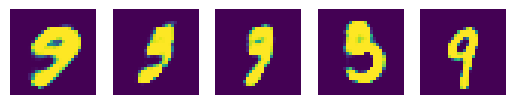

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from src.vae.mnist_vae import ConditionalVae
from src.plots import plot_vae_training_result, plot_image
cvae = ConditionalVae(dim_encoding=3)
checkpoint = torch.load('C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\0_cvae_0.1.pth')
cvae.load_state_dict(checkpoint)
plot_image(cvae.generate_data(n_samples=5, target_label=9))

In [ ]:
cvae = ConditionalVae(dim_encoding=3)
checkpoint = torch.load('C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\0_cvae_1.0.pth')
cvae.load_state_dict(checkpoint)
plot_image(cvae.generate_data(n_samples=5, target_label=1))

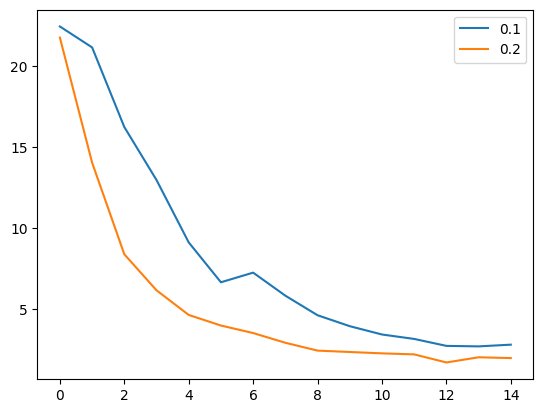

In [39]:
import pickle
path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\save\\objects\\fedimputed_cvae_0_0.1_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10].pkl"
with open(path, 'rb') as f:
    a = pickle.load(f)
path = f"C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\save\\objects\\fedimputed_cvae_0_0.2_mnist_exq_15_C[1.0]_iid[2]_E[1]_B[10].pkl"
with open(path, 'rb') as f:
    b = pickle.load(f)

plt.plot(np.mean(a[1], axis=0), label = f"0.1")
plt.plot(np.mean(b[1], axis=0), label = f"0.2")
plt.legend()
plt.show()

In [4]:
from src.impute import impute_cvae_naive

# print(impute_cvae_naive(k=100, trained_cvae=cvae, initial_dataset=training_data)[0][0].shape)
generated_cvae_dataset = impute_cvae_naive(k=100, trained_cvae=cvae, initial_dataset=training_data)

In [5]:
len(generated_cvae_dataset)

60100

In [6]:
generated_cvae_dataset[60099][0].shape

torch.Size([1, 28, 28])

In [7]:
cvae.generate_data(n_samples=1, target_label=1).shape

torch.Size([1, 1, 28, 28])

In [8]:
from src.impute import impute_naive
from src.vae.mnist_vae import VaeAutoencoderClassifier

trained_vae = VaeAutoencoderClassifier(dim_encoding=2)
trained_vae.load_state_dict(torch.load("C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data"
                                       f"\\models\\vae_{0.1}.pth"))

generated_train_dataset = impute_naive(k=100, trained_vae=trained_vae, initial_dataset=training_data)

In [9]:
len(generated_train_dataset)

60100

In [10]:
generated_train_dataset[60099][0].shape

torch.Size([1, 28, 28])

In [29]:
from src.models import ExquisiteNetV1
from sklearn.metrics import f1_score
import torch
model = ExquisiteNetV1(class_num=10, img_channels=1)
with torch.no_grad():
    output = model(torch.stack([test_img for test_img, _ in testing_data]))
predictions = torch.argmax(output, dim=1).cpu().numpy()  # Get class from model's prediction
test_labels = np.array([test_label for _, test_label in testing_data])
test_labels = np.array([label.item() for label in test_labels])
# Compute f1 score. Use 'micro' to aggregate the contributions of all classes when calculating the average
f1 = f1_score(test_labels, predictions, average='micro')
print("F1 Score: ", f1)

F1 Score:  0.1154


In [34]:
from src.models import ExquisiteNetV1
from sklearn.metrics import f1_score
import torch
model = ExquisiteNetV1(class_num=10, img_channels=1)
checkpoint = torch.load('C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\0_exq_0.1_cvae.pth')
model.load_state_dict(checkpoint)
with torch.no_grad():
    output = model(torch.stack([test_img for test_img, _ in testing_data]))
predictions = torch.argmax(output, dim=1).cpu().numpy()  # Get class from model's prediction
test_labels = np.array([test_label for _, test_label in testing_data])
test_labels = np.array([label.item() for label in test_labels])
# Compute f1 score. Use 'micro' to aggregate the contributions of all classes when calculating the average
f1 = f1_score(test_labels, predictions, average='macro')
print("F1 Score: ", f1)

F1 Score:  0.9476359645901823


In [37]:
from src.models import ExquisiteNetV1
from sklearn.metrics import f1_score
import torch
model = ExquisiteNetV1(class_num=10, img_channels=1)
checkpoint = torch.load('C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\0_exq_0.9_cvae.pth')
model.load_state_dict(checkpoint)
with torch.no_grad():
    output = model(torch.stack([test_img for test_img, _ in testing_data]))
predictions = torch.argmax(output, dim=1).cpu().numpy()  # Get class from model's prediction
test_labels = np.array([test_label for _, test_label in testing_data])
test_labels = np.array([label.item() for label in test_labels])
# Compute f1 score. Use 'micro' to aggregate the contributions of all classes when calculating the average
f1 = f1_score(test_labels, predictions, average='micro')
print("F1 Score: ", f1)

F1 Score:  0.9749
